# Generating IC's given a power spectrum

In [1]:
import cosmax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import jax

In [2]:
N = 128
MPC_h = 50

generator = cosmax.spectral_ops.Generator(N, MPC_h)

k = generator.k

# Lets generate a power spectrum from a power law
Pk = k**(-3)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


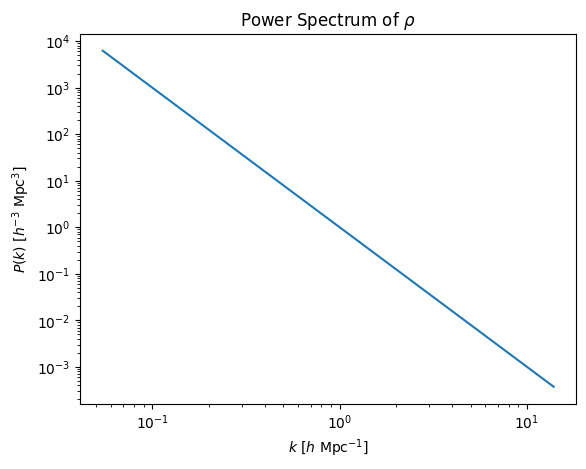

In [3]:
plt.plot(k, Pk, label='cosmax')
plt.title(r'Power Spectrum of $\rho$')
plt.xlabel(r'$k$ [$h \ \mathrm{Mpc}^{-1}$]')
plt.ylabel(r'$P(k)$ [$h^{-3} \ \mathrm{Mpc}^3$]')
plt.xscale('log')
plt.yscale('log')

In [4]:
# Generate the random field
key = jax.random.PRNGKey(123)
field = jax.random.normal(key, shape=(N, N, N))
field = generator(field, Pk)

Text(0.5, 1.0, '$\\rho$')

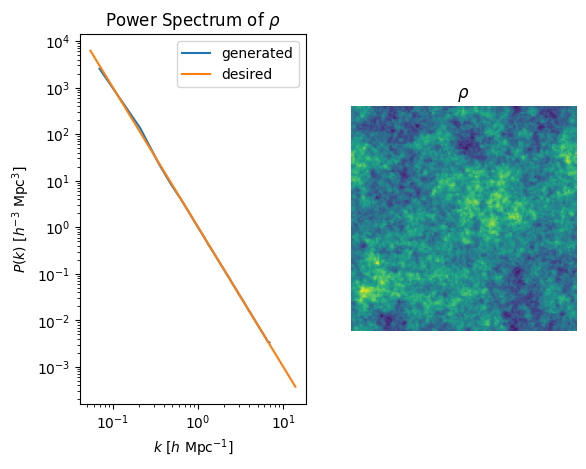

In [5]:

k_gen, Pk_gen = cosmax.spectral_ops.PowerSpectrum(N, MPC_h, 100)(field)

axs, fig = plt.subplots(1, 2)

fig[0].plot(k_gen, Pk_gen, label='generated')
fig[0].plot(k, Pk, label='desired')
fig[0].set_title(r'Power Spectrum of $\rho$')
fig[0].set_xlabel(r'$k$ [$h \ \mathrm{Mpc}^{-1}$]')
fig[0].set_ylabel(r'$P(k)$ [$h^{-3} \ \mathrm{Mpc}^3$]')
fig[0].set_xscale('log')
fig[0].set_yscale('log')
fig[0].legend()

fig[1].imshow(field[N//2])
# remove axis
fig[1].axis('off')
fig[1].set_title(r'$\rho$')

